In [ ]:
!wget https://github.com/rdfia/rdfia.github.io/raw/master/data/2-ab.zip && unzip -j 2-ab.zip > /dev/null
!wget https://github.com/rdfia/rdfia.github.io/raw/master/code/2-ab/utils-data.py

--2022-10-12 12:58:38--  https://github.com/rdfia/rdfia.github.io/raw/master/data/2-ab.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/data/2-ab.zip [following]
--2022-10-12 12:58:38--  https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/data/2-ab.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13423991 (13M) [application/zip]
Saving to: ‘2-ab.zip’

2-ab.zip            100%[===================>]  12.80M  --.-KB/s    in 0.1s    

2022-10-12 12:58:39 (93.5 MB/s) - ‘2-ab.zip’ saved [13423991/13423991]

--2022-10-12 12:58:39--  https://github.com/rdfia

In [ ]:
!mv utils-data.py utilsdata.py
import math
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from utilsdata import *

# Part 1 : Forward and backward passes "by hands"

In [20]:
def init_params(nx, nh, ny):
    """
    nx, nh, ny: integers
    out params: dictionnary
    """
    params = {}
    
    #####################
    ## Your code here  ##
    #####################
    # fill values for Wh, Wy, bh, by
    
    params["Wh"] = torch.randn(nh, nx)
    params["Wy"] = torch.randn(ny, nh)
    params["bh"] = torch.randn(nh)
    params["by"] = torch.randn(ny)
    
    ####################
    ##      END        #
    ####################
    return params

In [21]:
def forward(params, X):
    """
    params: dictionnary
    X: (n_batch, dimension)
    """
    bsize = X.size(0)
    nh = params['Wh'].size(0)
    ny = params['Wy'].size(0)
    outputs = {}

    #####################
    ## Your code here  ##
    #####################
    # fill values for X, htilde, h, ytilde, yhat
    
    outputs["X"] = X
    outputs["htilde"] = torch.mm(X, params["Wh"].T) + params["bh"]
    outputs["h"] = torch.tanh(outputs["htilde"])
    outputs["ytilde"] = torch.mm(outputs["h"], params["Wy"].T)  + params["by"]
    outputs["yhat"] = torch.softmax(outputs["ytilde"], dim=1)
    
    ####################
    ##      END        #
    ####################

    return outputs['yhat'], outputs

In [22]:
def loss_accuracy(Yhat, Y):

    bsize = Y.shape[0]

    #####################
    ## Your code here  ##
    #####################

    L = -torch.mean(torch.sum(Y * torch.log(Yhat), dim=1))
    _, idxY = torch.max(Y, dim=1)
    _, idxYhat = torch.max(Yhat, dim=1)
    acc = torch.sum(idxY == idxYhat) / bsize

    ####################
    ##      END        #
    ####################

    return L, acc

In [26]:
def backward(params, outputs, Y):
    bsize = Y.shape[0]
    grads = {}

    #####################
    ## Your code here  ##
    #####################
    # fill values for Wy, Wh, by, bh

    grads_yhat = (outputs["yhat"] - Y) / bsize
    grads["Wy"] = torch.mm(outputs["h"].T, grads_yhat)
    grads_h = torch.mm(grads_yhat, params["Wy"]) * (1 - outputs["h"]**2)
    grads["Wh"] = torch.mm(outputs["X"].T, grads_h)
    grads["by"] = torch.sum(grads_yhat, dim=0)
    grads["bh"] = torch.sum(grads_h, dim=0)
    
    ####################
    ##      END        #
    ####################
    return grads

In [28]:
def sgd(params, grads, eta):

    #####################
    ## Your code here  ##
    #####################
    # update the params values

    params["Wh"] -= eta * grads["Wh"].T
    params["Wy"] -= eta * grads["Wy"].T
    params["bh"] -= eta * grads["bh"]
    params["by"] -= eta * grads["by"]

    ####################
    ##      END        #
    ####################
    return params

## Global learning procedure "by hands"

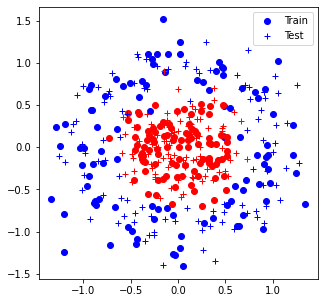

Iter 0: Acc train 0.6% (1.00), acc test 0.6% (1.02)
Iter 1: Acc train 0.6% (0.84), acc test 0.5% (0.86)
Iter 2: Acc train 0.5% (0.77), acc test 0.5% (0.78)
Iter 3: Acc train 0.5% (0.72), acc test 0.5% (0.73)
Iter 4: Acc train 0.6% (0.69), acc test 0.5% (0.70)
Iter 5: Acc train 0.6% (0.66), acc test 0.6% (0.67)
Iter 6: Acc train 0.6% (0.64), acc test 0.6% (0.65)
Iter 7: Acc train 0.6% (0.63), acc test 0.6% (0.63)
Iter 8: Acc train 0.7% (0.61), acc test 0.6% (0.62)
Iter 9: Acc train 0.7% (0.60), acc test 0.7% (0.61)
Iter 10: Acc train 0.7% (0.59), acc test 0.8% (0.59)
Iter 11: Acc train 0.7% (0.58), acc test 0.7% (0.58)
Iter 12: Acc train 0.8% (0.57), acc test 0.8% (0.57)
Iter 13: Acc train 0.8% (0.56), acc test 0.8% (0.56)
Iter 14: Acc train 0.8% (0.55), acc test 0.8% (0.55)
Iter 15: Acc train 0.8% (0.54), acc test 0.9% (0.54)
Iter 16: Acc train 0.8% (0.53), acc test 0.9% (0.54)
Iter 17: Acc train 0.8% (0.52), acc test 0.9% (0.53)
Iter 18: Acc train 0.8% (0.51), acc test 0.9% (0.52)
Ite

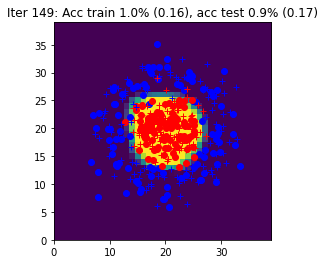

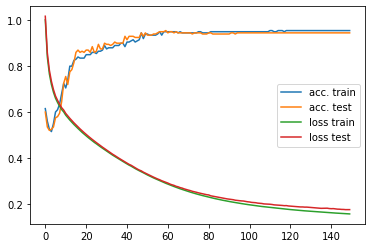

In [29]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03

params = init_params(nx, nh, ny)

curves = [[],[], [], []]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Your code here  ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        # write the optimization algorithm on the batch (X,Y)
        # using the functions: forward, loss_accuracy, backward, sgd
        yhat, outputs = forward(params, X)
        L, acc = loss_accuracy(yhat, Y)
        grads = backward(params, outputs, Y)
        params = sgd(params, grads, eta)


    ####################
    ##      END        #
    ####################


    Yhat_train, _ = forward(params, data.Xtrain)
    Yhat_test, _ = forward(params, data.Xtest)
    Ltrain, acctrain = loss_accuracy(Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(Yhat_test, data.Ytest)
    Ygrid, _ = forward(params, data.Xgrid)  

    title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
    print(title)
    # data.plot_data_with_grid(Ygrid, title)

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain)
    curves[3].append(Ltest)

data.plot_data_with_grid(Ygrid, title)

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

# Part 2 : Simplification of the backward pass with `torch.autograd`



In [35]:
def init_params(nx, nh, ny):
    """
    nx, nh, ny: integers
    out params: dictionnary
    """
    params = {}
    
    #####################
    ## Your code here  ##
    #####################
    # fill values for Wh, Wy, bh, by
    # activaye autograd on the network weights
    
    params["Wh"] = torch.randn(nh, nx, requires_grad=True)
    params["Wy"] = torch.randn(ny, nh, requires_grad=True)
    params["bh"] = torch.randn(nh, requires_grad=True)
    params["by"] = torch.randn(ny, requires_grad=True)
    
    ####################
    ##      END        #
    ####################
    return params

The function `forward` remains unchanged from previous part. 

The function `backward` is no longer used because of "autograd". 

In [44]:
def sgd(params, eta):

    #####################
    ## Your code here  ##
    #####################
    # update the network weights
    # warning: use torch.no_grad()
    # and reset to zero the gradient accumulators
    with torch.no_grad():
      params["Wh"] -= eta * params["Wh"].grad
      params["Wy"] -= eta * params["Wy"].grad
      params["bh"] -= eta * params["bh"].grad
      params["by"] -= eta * params["by"].grad

    params["Wh"].grad.zero_()
    params["Wy"].grad.zero_()
    params["bh"].grad.zero_()
    params["by"].grad.zero_()

    ####################
    ##      END        #
    ####################
    return params

## Global learning procedure with autograd

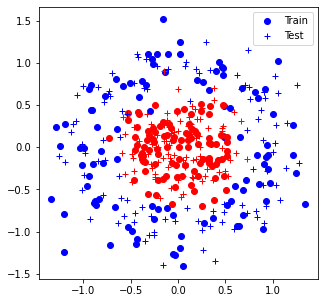

Iter 0: Acc train 0.5% (0.85), acc test 0.5% (0.87)
Iter 1: Acc train 0.6% (0.71), acc test 0.6% (0.74)
Iter 2: Acc train 0.7% (0.65), acc test 0.7% (0.67)
Iter 3: Acc train 0.7% (0.61), acc test 0.7% (0.63)
Iter 4: Acc train 0.7% (0.58), acc test 0.7% (0.60)
Iter 5: Acc train 0.8% (0.56), acc test 0.8% (0.58)
Iter 6: Acc train 0.8% (0.55), acc test 0.8% (0.56)
Iter 7: Acc train 0.8% (0.53), acc test 0.8% (0.54)
Iter 8: Acc train 0.9% (0.52), acc test 0.8% (0.53)
Iter 9: Acc train 0.8% (0.51), acc test 0.8% (0.52)
Iter 10: Acc train 0.9% (0.50), acc test 0.8% (0.50)
Iter 11: Acc train 0.9% (0.49), acc test 0.8% (0.49)
Iter 12: Acc train 0.9% (0.48), acc test 0.8% (0.48)
Iter 13: Acc train 0.9% (0.47), acc test 0.8% (0.47)
Iter 14: Acc train 0.9% (0.46), acc test 0.8% (0.46)
Iter 15: Acc train 0.9% (0.45), acc test 0.9% (0.45)
Iter 16: Acc train 0.9% (0.44), acc test 0.9% (0.44)
Iter 17: Acc train 0.9% (0.43), acc test 0.9% (0.43)
Iter 18: Acc train 0.9% (0.42), acc test 0.9% (0.42)
Ite

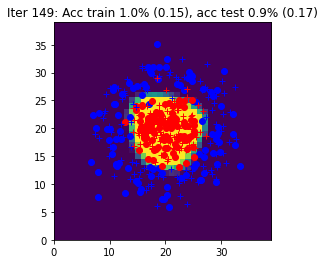

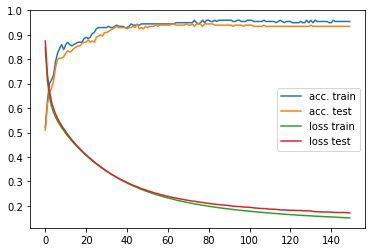

In [46]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03

params = init_params(nx, nh, ny)

curves = [[],[], [], []]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Your code here  ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]
  
        # write the optimization algorithm on the batch (X,Y)
        # using the functions: forward, loss_accuracy, sgd
        # and the backward function with autograd
        yhat, outputs = forward(params, X)
        L, acc = loss_accuracy(yhat, Y)
        L.backward()
        params = sgd(params, eta)

    ####################
    ##      END        #
    ####################


    Yhat_train, _ = forward(params, data.Xtrain)
    Yhat_test, _ = forward(params, data.Xtest)
    Ltrain, acctrain = loss_accuracy(Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(Yhat_test, data.Ytest)
    Ygrid, _ = forward(params, data.Xgrid)  

    title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
    print(title)
    # detach() is used to remove the predictions from the computational graph in autograd

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain.detach().numpy())
    curves[3].append(Ltest.detach().numpy())

data.plot_data_with_grid(Ygrid.detach(), title)
fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

# Part 3 : Simplification of the forward pass with `torch.nn`

`init_params` and `forward` are replaced by the `init_model` function which defines the network architecture and the loss.

In [47]:
def init_model(nx, nh, ny):

    #####################
    ## Your code here  ##
    #####################

    model = torch.nn.Sequential(
        torch.nn.Linear(nx,nh),
        torch.nn.Tanh(),
        torch.nn.Linear(nh,ny),
        torch.nn.Softmax())
    loss = torch.nn.MSELoss()

    ####################
    ##      END        #
    ####################

    return model, loss

In [48]:
def loss_accuracy(loss, Yhat, Y):

    #####################
    ## Your code here  ##
    #####################
    # call the loss function

    bsize = Yhat.shape[0]
    _, idxY = torch.max(Y, dim=1)
    _, idxYhat = torch.max(Yhat, dim=1)
    acc = torch.sum(idxY == idxYhat) / bsize
    L = loss(Yhat,Y)

    ####################
    ##      END        #
    ####################

    return L, acc

In [49]:
def sgd(model, eta):

    #####################
    ## Your code here  ##
    #####################
    # update the network weights
    # warning: use torch.no_grad()
    # and reset to zero the gradient accumulators

    with torch.no_grad():
      for param in model.parameters():
        param -= eta*param.grad
      model.zero_grad()

    ####################
    ##      END        #
    ####################
    return model

## Global learning procedure with autograd and `torch.nn`

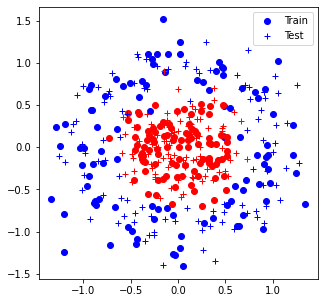

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Iter 0: Acc train 0.5% (0.27), acc test 0.5% (0.27)
Iter 1: Acc train 0.4% (0.26), acc test 0.4% (0.26)
Iter 2: Acc train 0.4% (0.26), acc test 0.4% (0.26)
Iter 3: Acc train 0.4% (0.26), acc test 0.3% (0.26)
Iter 4: Acc train 0.4% (0.25), acc test 0.3% (0.26)
Iter 5: Acc train 0.4% (0.25), acc test 0.4% (0.26)
Iter 6: Acc train 0.4% (0.25), acc test 0.4% (0.25)
Iter 7: Acc train 0.5% (0.25), acc test 0.4% (0.25)
Iter 8: Acc train 0.5% (0.25), acc test 0.4% (0.25)
Iter 9: Acc train 0.5% (0.25), acc test 0.5% (0.25)
Iter 10: Acc train 0.5% (0.25), acc test 0.5% (0.25)
Iter 11: Acc train 0.5% (0.25), acc test 0.5% (0.25)
Iter 12: Acc train 0.5% (0.25), acc test 0.5% (0.25)
Iter 13: Acc train 0.5% (0.25), acc test 0.6% (0.25)
Iter 14: Acc train 0.6% (0.25), acc test 0.6% (0.25)
Iter 15: Acc train 0.6% (0.25), acc test 0.6% (0.25)
Iter 16: Acc train 0.5% (0.25), acc test 0.6% (0.25)
Iter 17: Acc train 0.6% (0.25), acc test 0.6% (0.25)
Iter 18: Acc train 0.6% (0.25), acc test 0.6% (0.25)
Ite

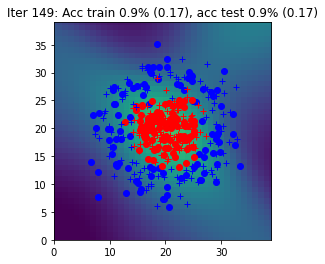

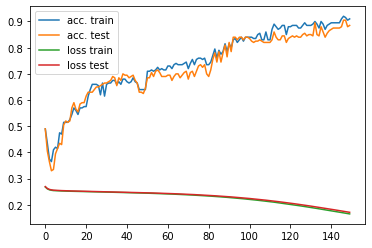

In [52]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03

model, loss = init_model(nx, nh, ny)

curves = [[],[], [], []]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Your code here  ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        # write the optimization algorithm on the batch (X,Y)
        # using the functions: loss_accuracy, sgd
        # the forward with the predict method from the model
        # and the backward function with autograd
        Yhat = model(X)
        L, acc = loss_accuracy(loss, Yhat, Y)
        L.backward()
        model = sgd(model, eta)

    ####################
    ##      END        #
    ####################


    Yhat_train = model(data.Xtrain)
    Yhat_test = model(data.Xtest)
    Ltrain, acctrain = loss_accuracy(loss, Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(loss, Yhat_test, data.Ytest)
    Ygrid = model(data.Xgrid)  

    title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
    print(title) 

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain.detach().numpy())
    curves[3].append(Ltest.detach().numpy())

data.plot_data_with_grid(torch.nn.Softmax(dim=1)(Ygrid.detach()), title)
fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

# Part 4 : Simplification of the SGD with `torch.optim`

In [53]:
def init_model(nx, nh, ny, eta):

    #####################
    ## Your code here  ##
    #####################

    model = torch.nn.Sequential(
        torch.nn.Linear(nx,nh),
        torch.nn.Tanh(),
        torch.nn.Linear(nh,ny),
        torch.nn.Softmax())
    loss = torch.nn.MSELoss()
    optim = torch.optim.SGD(model.parameters(), lr=eta)

    ####################
    ##      END        #
    ####################

    return model, loss, optim

The `sgd` function is replaced by calling the `optim.zero_grad()` before the backward and `optim.step()` after. 

## Algorithme global d'apprentissage (avec autograd, les couches `torch.nn` et `torch.optim`)

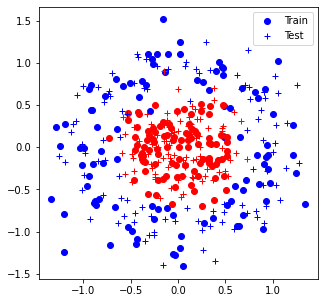

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Iter 0: Acc train 0.5% (0.26), acc test 0.5% (0.26)
Iter 1: Acc train 0.4% (0.26), acc test 0.4% (0.26)
Iter 2: Acc train 0.4% (0.26), acc test 0.4% (0.26)
Iter 3: Acc train 0.3% (0.25), acc test 0.4% (0.26)
Iter 4: Acc train 0.4% (0.25), acc test 0.4% (0.25)
Iter 5: Acc train 0.5% (0.25), acc test 0.5% (0.25)
Iter 6: Acc train 0.6% (0.25), acc test 0.6% (0.25)
Iter 7: Acc train 0.6% (0.25), acc test 0.6% (0.25)
Iter 8: Acc train 0.6% (0.25), acc test 0.6% (0.25)
Iter 9: Acc train 0.6% (0.25), acc test 0.6% (0.25)
Iter 10: Acc train 0.6% (0.25), acc test 0.6% (0.25)
Iter 11: Acc train 0.6% (0.25), acc test 0.6% (0.25)
Iter 12: Acc train 0.6% (0.25), acc test 0.6% (0.25)
Iter 13: Acc train 0.6% (0.25), acc test 0.6% (0.25)
Iter 14: Acc train 0.6% (0.25), acc test 0.6% (0.25)
Iter 15: Acc train 0.6% (0.25), acc test 0.6% (0.25)
Iter 16: Acc train 0.6% (0.25), acc test 0.6% (0.25)
Iter 17: Acc train 0.6% (0.25), acc test 0.6% (0.25)
Iter 18: Acc train 0.6% (0.25), acc test 0.6% (0.25)
Ite

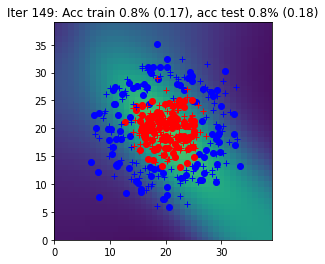

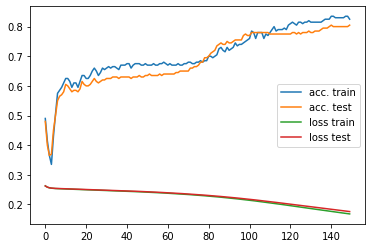

In [54]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03

model, loss, optim = init_model(nx, nh, ny, eta)

curves = [[],[], [], []]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Your code  here ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]
  
        # write the optimization algorithm on the batch (X,Y)
        # using the functions: loss_accuracy
        # the forward with the predict method from the model
        # the backward function with autograd
        # and then an optimization step
        Yhat = model(X)
        L, acc = loss_accuracy(loss, Yhat, Y)
        L.backward()
        optim.step()
        optim.zero_grad()

    ####################
    ##      FIN        #
    ####################


    Yhat_train = model(data.Xtrain)
    Yhat_test = model(data.Xtest)
    Ltrain, acctrain = loss_accuracy(loss, Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(loss, Yhat_test, data.Ytest)
    Ygrid = model(data.Xgrid)  

    title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
    print(title) 

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain.detach().numpy())
    curves[3].append(Ltest.detach().numpy())

data.plot_data_with_grid(torch.nn.Softmax(dim=1)(Ygrid.detach()), title)
fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

# Part 5 : MNIST

Apply the code from previous part code to the MNIST dataset.

In [55]:
# init
data = MNISTData()
N = data.Xtrain.shape[0]
Nbatch = 100
nx = data.Xtrain.shape[1]
nh = 100
ny = data.Ytrain.shape[1]
eta = 0.03

model, loss, optim = init_model(nx, nh, ny, eta)

curves = [[],[], [], []]

for iteration in range(150):

    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        Yhat = model(X)
        L, acc = loss_accuracy(loss, Yhat, Y)
        L.backward()
        optim.step()
        optim.zero_grad()

    Yhat_train = model(data.Xtrain)
    Yhat_test = model(data.Xtest)
    Ltrain, acctrain = loss_accuracy(loss, Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(loss, Yhat_test, data.Ytest)

    title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
    print(title)

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain.detach().numpy())
    curves[3].append(Ltest.detach().numpy())

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Iter 0: Acc train 0.8% (0.03), acc test 0.8% (0.03)
Iter 1: Acc train 0.9% (0.02), acc test 0.9% (0.02)
Iter 2: Acc train 0.9% (0.02), acc test 0.9% (0.02)
Iter 3: Acc train 0.9% (0.02), acc test 0.9% (0.02)
Iter 4: Acc train 0.9% (0.01), acc test 0.9% (0.01)
Iter 5: Acc train 0.9% (0.01), acc test 0.9% (0.01)
Iter 6: Acc train 0.9% (0.01), acc test 0.9% (0.01)
Iter 7: Acc train 0.9% (0.01), acc test 0.9% (0.01)
Iter 8: Acc train 0.9% (0.01), acc test 0.9% (0.01)
Iter 9: Acc train 0.9% (0.01), acc test 0.9% (0.01)
Iter 10: Acc train 0.9% (0.01), acc test 0.9% (0.01)
Iter 11: Acc train 0.9% (0.01), acc test 0.9% (0.01)
Iter 12: Acc train 0.9% (0.01), acc test 0.9% (0.01)
Iter 13: Acc train 0.9% (0.01), acc test 0.9% (0.01)
Iter 14: Acc train 0.9% (0.01), acc test 0.9% (0.01)
Iter 15: Acc train 0.9% (0.01), acc test 0.9% (0.01)
Iter 16: Acc train 0.9% (0.01), acc test 0.9% (0.01)
Iter 17: Acc train 0.9% (0.01), acc test 0.9% (0.01)
Iter 18: Acc train 0.9% (0.01), acc test 0.9% (0.01)
Ite

KeyboardInterrupt: ignored

# Part 6: Bonus: SVM


Train a SVM model on the Circles dataset.

Ideas : 
- First try a linear SVM (sklearn.svm.LinearSVC dans scikit-learn). Does it work well ? Why ?
- Then try more complex kernels (sklearn.svm.SVC). Which one is the best ? why ?
- Does the parameter C of regularization have an impact? Why ?

In [ ]:
# data
data = CirclesData()
Xtrain = data.Xtrain.numpy()
Ytrain = data.Ytrain[:, 0].numpy()

Xgrid = data.Xgrid.numpy()

Xtest = data.Xtest.numpy()
Ytest = data.Ytest[:, 0].numpy()

def plot_svm_predictions(data, predictions):
      plt.figure(2)
      plt.clf()
      plt.imshow(np.reshape(predictions, (40,40)))
      plt.plot(data._Xtrain[data._Ytrain[:,0] == 1,0]*10+20, data._Xtrain[data._Ytrain[:,0] == 1,1]*10+20, 'bo', label="Train")
      plt.plot(data._Xtrain[data._Ytrain[:,1] == 1,0]*10+20, data._Xtrain[data._Ytrain[:,1] == 1,1]*10+20, 'ro')
      plt.plot(data._Xtest[data._Ytest[:,0] == 1,0]*10+20, data._Xtest[data._Ytest[:,0] == 1,1]*10+20, 'b+', label="Test")
      plt.plot(data._Xtest[data._Ytest[:,1] == 1,0]*10+20, data._Xtest[data._Ytest[:,1] == 1,1]*10+20, 'r+')
      plt.xlim(0,39)
      plt.ylim(0,39)
      plt.clim(0.3,0.7)
      plt.draw()
      plt.pause(1e-3)

In [ ]:
import sklearn.svm

############################
### Your code here   #######
### Train the SVM    #######
## See https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
## and https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
############################

svm = None

###########################

In [ ]:
## Print results

Ytest_pred = svm.predict(Xtest)
accuracy = np.sum(Ytest == Ytest_pred) / len(Ytest)
print(f"Accuracy : {100 * accuracy:.2f}")
Ygrid_pred = svm.predict(Xgrid)
plot_svm_predictions(data, Ygrid_pred)